In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [12]:
scaler_feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
df_feat = pd.DataFrame(scaler_feat,columns=df.columns[:-1])

In [14]:
X = df_feat
y = df['TARGET CLASS']


In [15]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

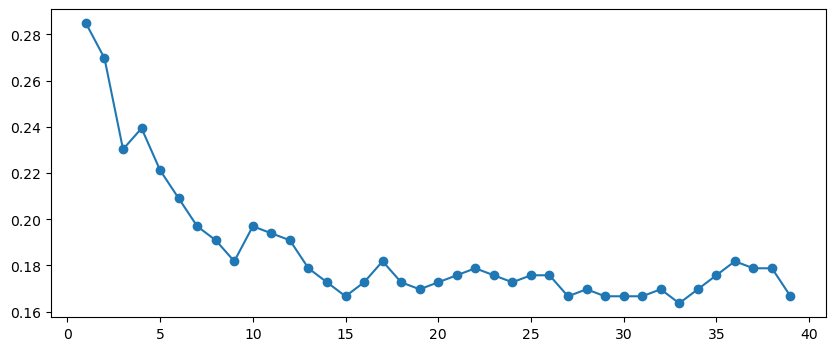

In [26]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40),error_rate,marker = 'o')

In [33]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predict))
print('\n')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       147
           1       0.82      0.84      0.83       153

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



[[118  29]
 [ 24 129]]
